# import modules

In [5]:
import glob, sys

sys.path.insert(0, "../")
from modules.contours_ver2 import *
from modules.contour_multimodality import *
from modules.plot_utils import *

# super contour data

In [6]:
file_pattern = "../data/sys3_TACC_super_contour_mcz40_?_2024-07-29_*.pkl"
files = glob.glob(file_pattern)

data = {}

for file in files:
    with open(file, "rb") as f:
        file = pickle.load(f)
        data.update(file)

In [7]:
data = get_super_contour_stats(data, thres_factor=1.01, thres_diff=0)
print(data.keys())
print(data[0.02].keys())

dict_keys([0.044615, 0.045641, 0.046667, 0.047692, 'td_arr', 'I_arr', 'source_params', 'template_params', 0.048718, 0.049744, 0.050769, 0.051795, 0.040513, 0.041538, 0.042564, 0.04359, 0.056923, 0.057949, 0.058974, 0.06, 0.032308, 0.033333, 0.034359, 0.035385, 0.052821, 0.053846, 0.054872, 0.055897, 0.028205, 0.029231, 0.030256, 0.031282, 0.03641, 0.037436, 0.038462, 0.039487, 0.024103, 0.025128, 0.026154, 0.027179, 0.02, 0.021026, 0.022051, 0.023077])
dict_keys([0.1, 0.120513, 0.141026, 0.161538, 0.182051, 0.202564, 0.223077, 0.24359, 0.264103, 0.284615, 0.305128, 0.325641, 0.346154, 0.366667, 0.387179, 0.407692, 0.428205, 0.448718, 0.469231, 0.489744, 0.510256, 0.530769, 0.551282, 0.571795, 0.592308, 0.612821, 0.633333, 0.653846, 0.674359, 0.694872, 0.715385, 0.735897, 0.75641, 0.776923, 0.797436, 0.817949, 0.838462, 0.858974, 0.879487, 0.9, 'td', 'I_arr', 'y_arr', 'MLz_arr'])


In [8]:
with open("../data/sys3_super_contour_L_NP_mcz40_2024-07-29_10-24-02.pkl", "rb") as f:
    data_NP_L = pickle.load(f)

data_NP_L.keys()

dict_keys([0.02, 0.021026, 0.022051, 0.023077, 0.024103, 0.025128, 0.026154, 0.027179, 0.028205, 0.029231, 0.030256, 0.031282, 0.032308, 0.033333, 0.034359, 0.035385, 0.03641, 0.037436, 0.038462, 0.039487, 0.040513, 0.041538, 0.042564, 0.04359, 0.044615, 0.045641, 0.046667, 0.047692, 0.048718, 0.049744, 0.050769, 0.051795, 0.052821, 0.053846, 0.054872, 0.055897, 0.056923, 0.057949, 0.058974, 0.06, 'td_arr', 'I_arr', 'source_params', 'template_params'])

# super contours

In [9]:
td_arr = np.sort(np.array([td for td in data.keys() if isinstance(td, float)]))
I_arr = np.round(data["I_arr"], 6)
X, Y = np.meshgrid(td_arr, I_arr)
src_params = data["source_params"]

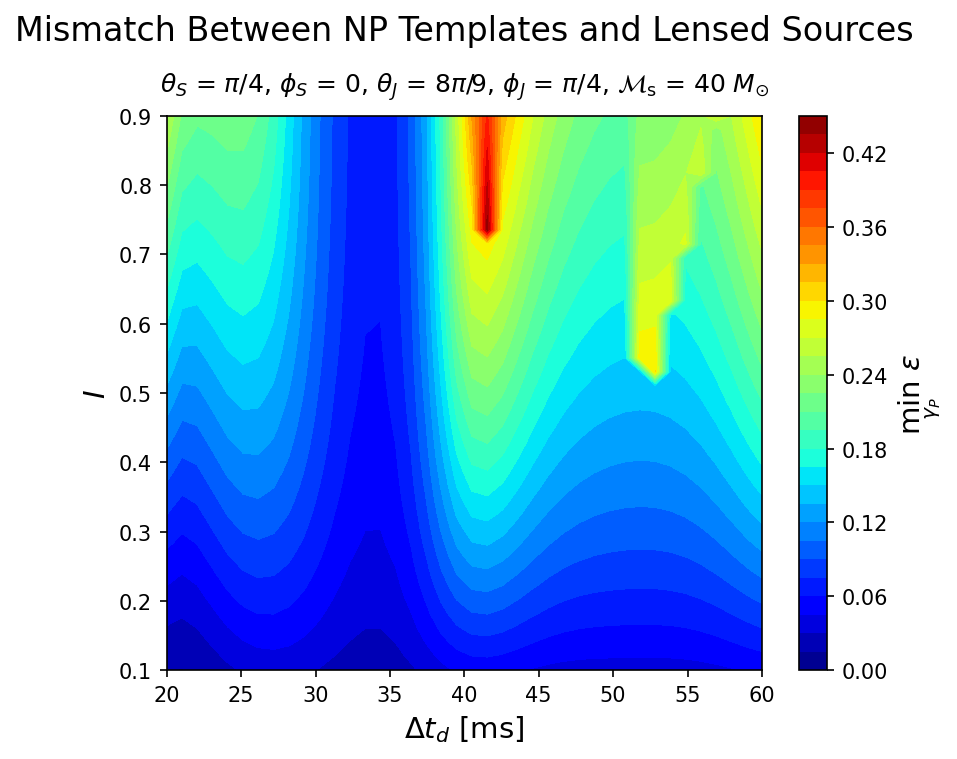

In [10]:
ep_NP_L_mtx = np.zeros_like(X)

for c, td in enumerate(td_arr):
    for r, I in enumerate(I_arr):
        ep_NP_L_mtx[r, c] = data_NP_L[td][I]["contour"]["epsilon"]

plt.contourf(X * 1e3, Y, ep_NP_L_mtx, levels=40, cmap="jet")
plt.xlabel(r"$\Delta t_d$ [ms]", fontsize=14)
plt.ylabel(r"$I$", fontsize=14)
plt.colorbar(cmap="jet", norm=colors.Normalize(vmin=0, vmax=1)).set_label(
    label=r"$\min_{\gamma_P}$ $\epsilon$", size=14
)
plt.suptitle(
    "Mismatch Between NP Templates and Lensed Sources",
    fontsize=16,
    y=1.0215,
    x=0.435,
)

plt.title(
    r"$\theta_S$ = {}, $\phi_S$ = {}, $\theta_J$ = {}, $\phi_J$ = {}, {} = {:.3g} {}".format(
        angle_in_pi_format(src_params["theta_S"]),
        angle_in_pi_format(src_params["phi_S"]),
        angle_in_pi_format(src_params["theta_J"]),
        angle_in_pi_format(src_params["phi_J"]),
        r"$\mathcal{M}_{\rm s}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
    ),
    fontsize=12,
    y=1.021,
)
plt.show()

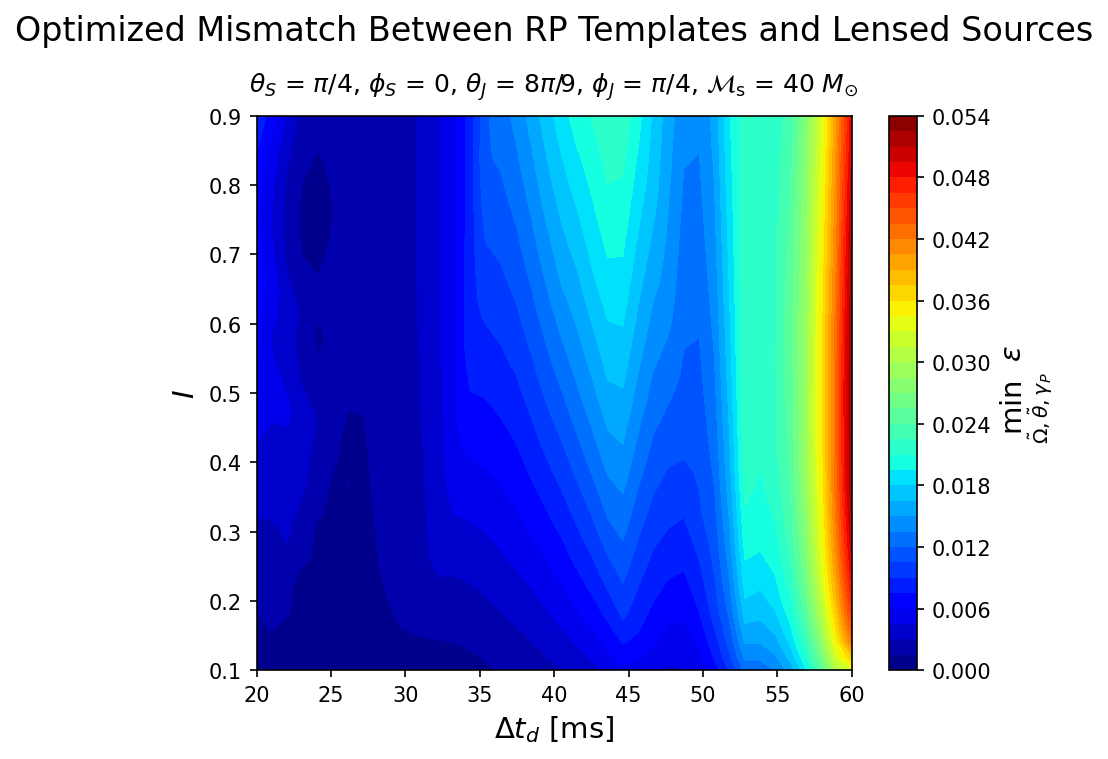

In [11]:
ep_min_mtx = np.zeros_like(X)

for c, td in enumerate(td_arr):
    for r, I in enumerate(I_arr):
        ep_min_mtx[r, c] = data[td][I]["stats"]["ep_min"]

plt.contourf(X * 1e3, Y, ep_min_mtx, levels=40, cmap="jet")
plt.xlabel(r"$\Delta t_d$ [ms]", fontsize=14)
plt.ylabel(r"$I$", fontsize=14)
plt.colorbar(cmap="jet", norm=colors.Normalize(vmin=0, vmax=1)).set_label(
    label=r"$\min_{\~\Omega, \~\theta, \gamma_P}$ $\epsilon$", size=14
)
plt.suptitle(
    "Optimized Mismatch Between RP Templates and Lensed Sources",
    fontsize=16,
    y=1.0215,
    x=0.435,
)

plt.title(
    r"$\theta_S$ = {}, $\phi_S$ = {}, $\theta_J$ = {}, $\phi_J$ = {}, {} = {:.3g} {}".format(
        angle_in_pi_format(src_params["theta_S"]),
        angle_in_pi_format(src_params["phi_S"]),
        angle_in_pi_format(src_params["theta_J"]),
        angle_in_pi_format(src_params["phi_J"]),
        r"$\mathcal{M}_{\rm s}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
    ),
    fontsize=12,
    y=1.021,
)
plt.show()

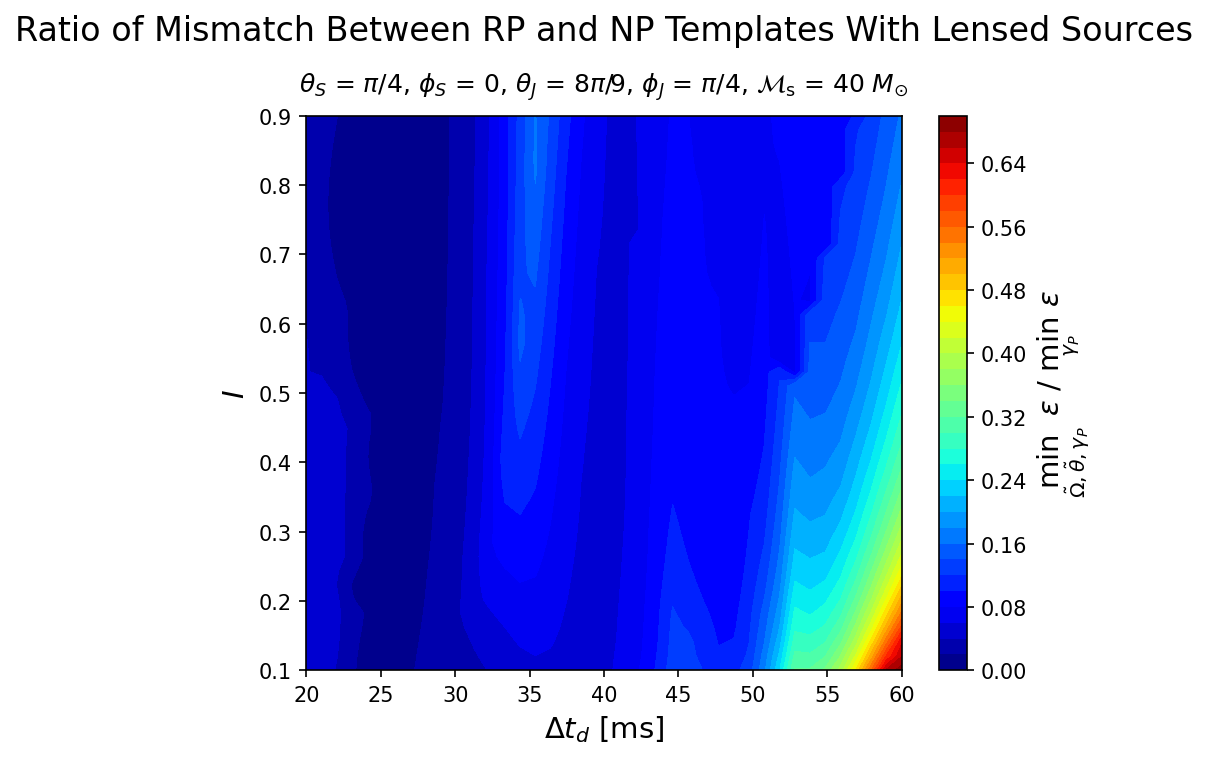

In [12]:
# create a contour that shows the ratio between the two above
ep_ratio_mtx = np.zeros_like(X)

for c, td in enumerate(td_arr):
    for r, I in enumerate(I_arr):
        ep_ratio_mtx[r, c] = ep_min_mtx[r, c] / ep_NP_L_mtx[r, c]

plt.contourf(X * 1e3, Y, ep_ratio_mtx, levels=40, cmap="jet")
plt.xlabel(r"$\Delta t_d$ [ms]", fontsize=14)
plt.ylabel(r"$I$", fontsize=14)
plt.colorbar(cmap="jet", norm=colors.Normalize(vmin=0, vmax=1)).set_label(
    label=r"$\min_{\~\Omega, \~\theta, \gamma_P}$ $\epsilon$ / $\min_{\gamma_P}$ $\epsilon$",
    size=14,
)
plt.suptitle(
    "Ratio of Mismatch Between RP and NP Templates With Lensed Sources",
    fontsize=16,
    y=1.0215,
    x=0.435,
)

plt.title(
    r"$\theta_S$ = {}, $\phi_S$ = {}, $\theta_J$ = {}, $\phi_J$ = {}, {} = {:.3g} {}".format(
        angle_in_pi_format(src_params["theta_S"]),
        angle_in_pi_format(src_params["phi_S"]),
        angle_in_pi_format(src_params["theta_J"]),
        angle_in_pi_format(src_params["phi_J"]),
        r"$\mathcal{M}_{\rm s}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
    ),
    fontsize=12,
    y=1.021,
)
plt.show()

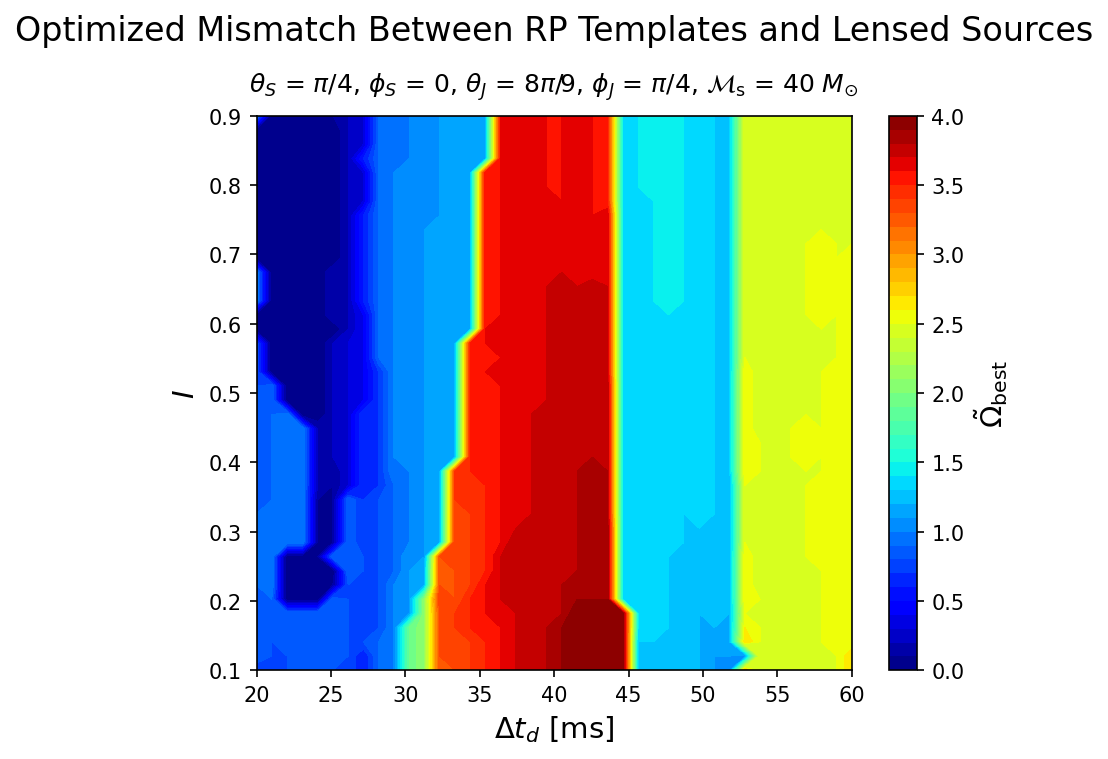

In [13]:
best_omega_mtx = np.zeros_like(X)

for c, td in enumerate(td_arr):
    for r, I in enumerate(I_arr):
        best_omega_mtx[r, c] = data[td][I]["stats"]["ep_min_omega_tilde"]

plt.contourf(X * 1e3, Y, best_omega_mtx, levels=40, cmap="jet")
plt.xlabel(r"$\Delta t_d$ [ms]", fontsize=14)
plt.ylabel(r"$I$", fontsize=14)
plt.colorbar(cmap="jet", norm=colors.Normalize(vmin=0, vmax=1)).set_label(
    label=r"$\~{\Omega}_{\rm best}$", size=14
)
plt.suptitle(
    "Optimized Mismatch Between RP Templates and Lensed Sources",
    fontsize=16,
    y=1.0215,
    x=0.435,
)

plt.title(
    r"$\theta_S$ = {}, $\phi_S$ = {}, $\theta_J$ = {}, $\phi_J$ = {}, {} = {:.3g} {}".format(
        angle_in_pi_format(src_params["theta_S"]),
        angle_in_pi_format(src_params["phi_S"]),
        angle_in_pi_format(src_params["theta_J"]),
        angle_in_pi_format(src_params["phi_J"]),
        r"$\mathcal{M}_{\rm s}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
    ),
    fontsize=12,
    y=1.021,
)
plt.show()

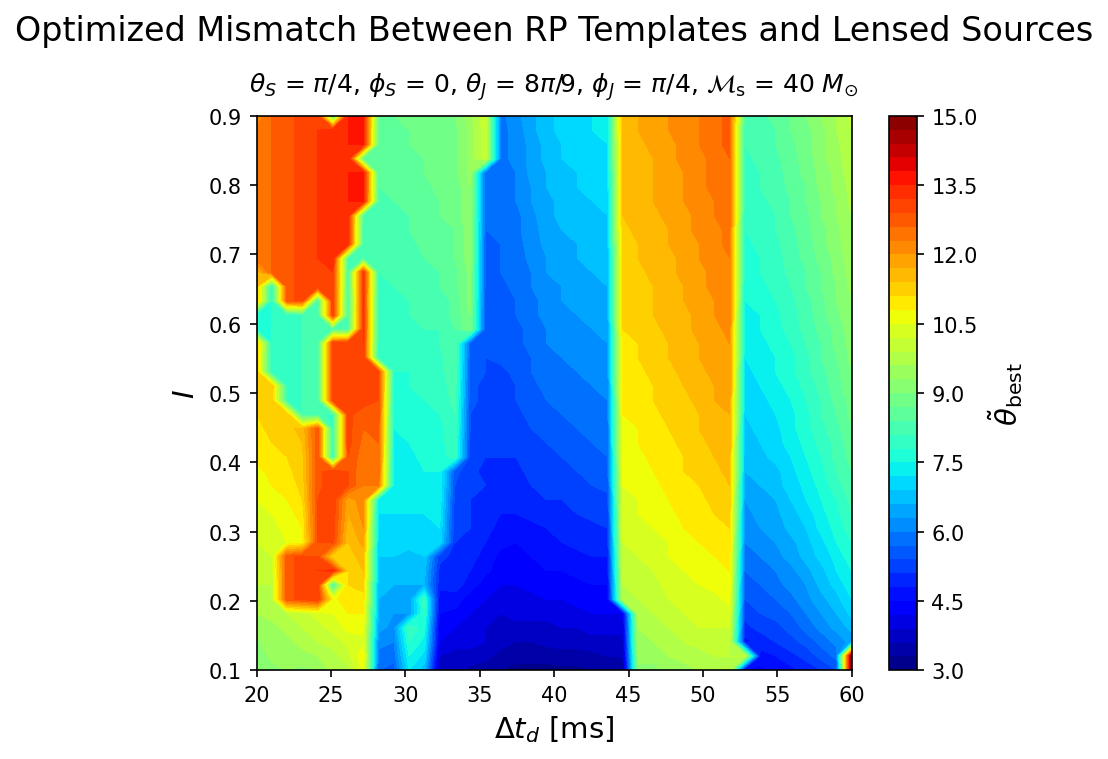

In [14]:
best_theta_mtx = np.zeros_like(X)

for c, td in enumerate(td_arr):
    for r, I in enumerate(I_arr):
        best_theta_mtx[r, c] = data[td][I]["stats"]["ep_min_theta_tilde"]

plt.contourf(X * 1e3, Y, best_theta_mtx, levels=40, cmap="jet")
plt.xlabel(r"$\Delta t_d$ [ms]", fontsize=14)
plt.ylabel(r"$I$", fontsize=14)
plt.colorbar(cmap="jet", norm=colors.Normalize(vmin=0, vmax=1)).set_label(
    label=r"$\~{\theta}_{\rm best}$", size=14
)
plt.suptitle(
    "Optimized Mismatch Between RP Templates and Lensed Sources",
    fontsize=16,
    y=1.0215,
    x=0.435,
)

plt.title(
    r"$\theta_S$ = {}, $\phi_S$ = {}, $\theta_J$ = {}, $\phi_J$ = {}, {} = {:.3g} {}".format(
        angle_in_pi_format(src_params["theta_S"]),
        angle_in_pi_format(src_params["phi_S"]),
        angle_in_pi_format(src_params["theta_J"]),
        angle_in_pi_format(src_params["phi_J"]),
        r"$\mathcal{M}_{\rm s}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
    ),
    fontsize=12,
    y=1.021,
)
plt.show()

# as a function of $\Delta t_d$ while fixing $I$

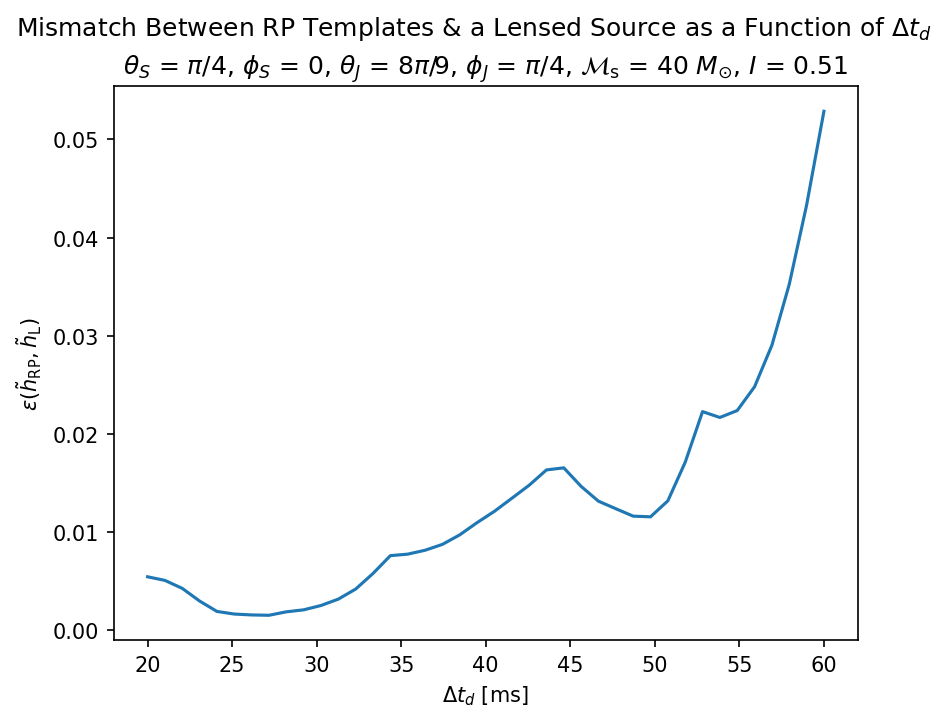

In [15]:
r = 20
td_ep_min_arr = ep_min_mtx[r, :]

plt.plot(td_arr * 1e3, td_ep_min_arr, label=r"$\epsilon(\~h_{\rm RP}, \~h_{\rm L})$")
plt.xlabel(r"$\Delta t_d$ [ms]")
plt.ylabel(r"$\epsilon(\~h_{\rm RP}, \~h_{\rm L})$")

plt.title(
    r"$\theta_S$ = {}, $\phi_S$ = {}, $\theta_J$ = {}, $\phi_J$ = {}, {} = {:.3g} {}, $I$ = {:.3g}".format(
        angle_in_pi_format(src_params["theta_S"]),
        angle_in_pi_format(src_params["phi_S"]),
        angle_in_pi_format(src_params["theta_J"]),
        angle_in_pi_format(src_params["phi_J"]),
        r"$\mathcal{M}_{\text{s}}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        I_arr[r],
    )
)

plt.suptitle(
    r"Mismatch Between RP Templates & a Lensed Source as a Function of $\Delta t_d$"
)

plt.show()

In [16]:
td_best_omega_arr = best_omega_mtx[r, :]
omega_min_err_mtx = np.zeros_like(X)
omega_max_err_mtx = np.zeros_like(X)

for x, td in enumerate(td_arr):
    for y, I in enumerate(I_arr):
        omega_min_err_mtx[y, x] = np.min(data[td][I]["stats"]["omega_tilde_err"])
        omega_max_err_mtx[y, x] = np.max(data[td][I]["stats"]["omega_tilde_err"])

omega_err_arr = np.array(
    [
        td_best_omega_arr - omega_min_err_mtx[r, :],
        omega_max_err_mtx[r, :] - td_best_omega_arr,
    ]
)

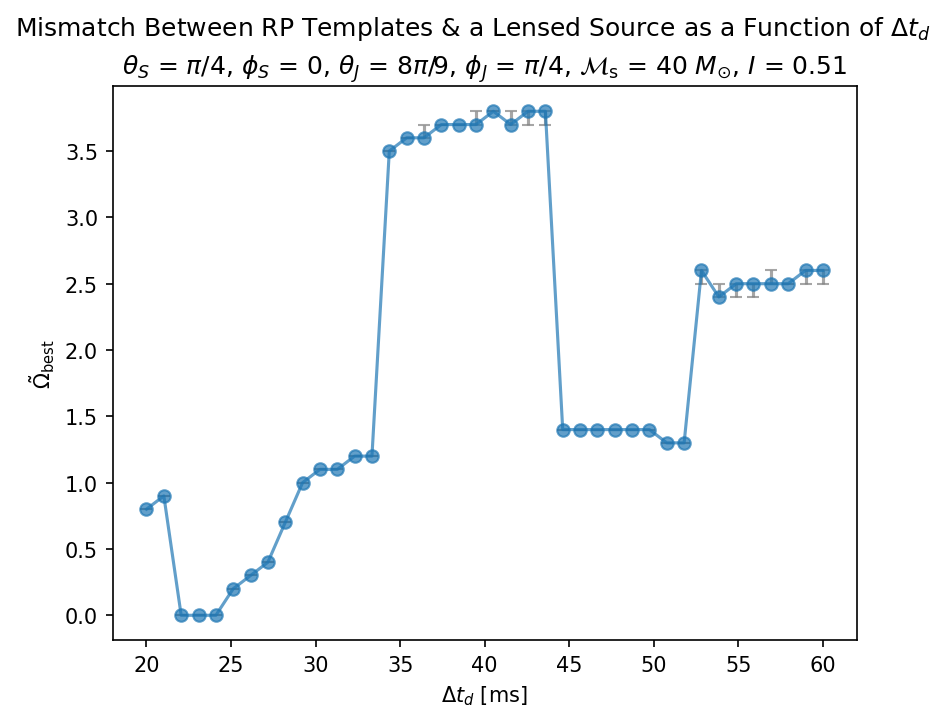

In [17]:
plt.errorbar(
    td_arr * 1e3,
    td_best_omega_arr,
    yerr=omega_err_arr,
    fmt="-o",
    label=r"$\~{\Omega}_{\rm best}$",
    capsize=3,
    ecolor="grey",
    alpha=0.7,
)
plt.xlabel(r"$\Delta t_d$ [ms]")
plt.ylabel(r"$\~{\Omega}_{\rm best}$")

plt.title(
    r"$\theta_S$ = {}, $\phi_S$ = {}, $\theta_J$ = {}, $\phi_J$ = {}, {} = {:.3g} {}, $I$ = {:.3g}".format(
        angle_in_pi_format(src_params["theta_S"]),
        angle_in_pi_format(src_params["phi_S"]),
        angle_in_pi_format(src_params["theta_J"]),
        angle_in_pi_format(src_params["phi_J"]),
        r"$\mathcal{M}_{\text{s}}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        I_arr[r],
    )
)

plt.suptitle(
    r"Mismatch Between RP Templates & a Lensed Source as a Function of $\Delta t_d$"
)

plt.show()

In [18]:
td_best_theta_arr = best_theta_mtx[r, :]
theta_min_err_mtx = np.zeros_like(X)
theta_max_err_mtx = np.zeros_like(X)

for x, td in enumerate(td_arr):
    for y, I in enumerate(I_arr):
        theta_min_err_mtx[y, x] = np.min(data[td][I]["stats"]["theta_tilde_err"])
        theta_max_err_mtx[y, x] = np.max(data[td][I]["stats"]["theta_tilde_err"])

theta_err_arr = np.array(
    [
        td_best_theta_arr - theta_min_err_mtx[r, :],
        theta_max_err_mtx[r, :] - td_best_theta_arr,
    ]
)

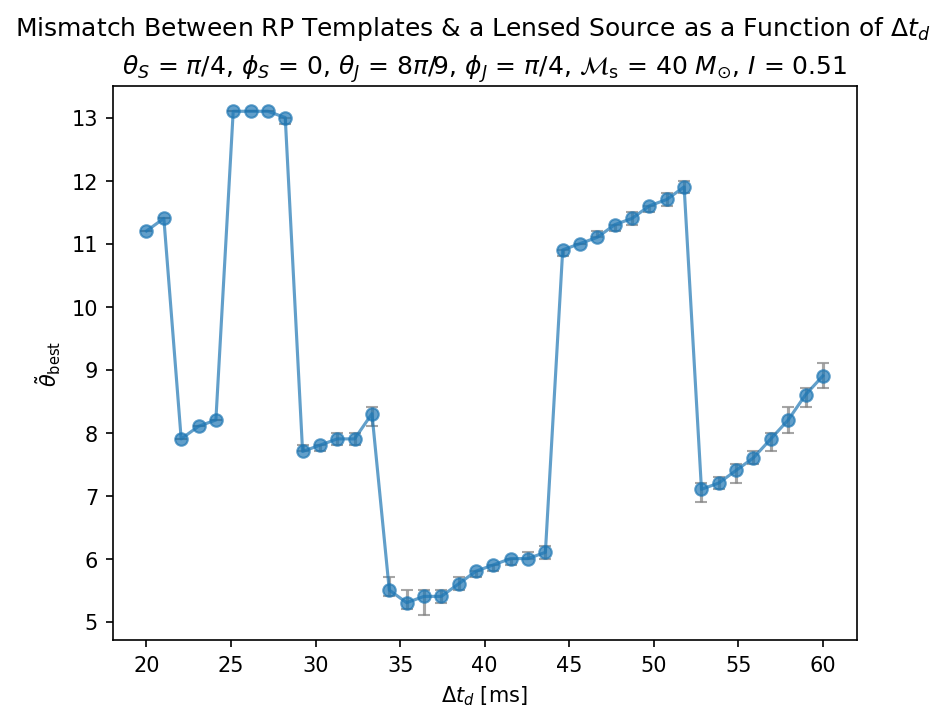

In [19]:
plt.errorbar(
    td_arr * 1e3,
    td_best_theta_arr,
    yerr=theta_err_arr,
    fmt="-o",
    label=r"$\~{\theta}_{\rm best}$",
    capsize=3,
    ecolor="grey",
    alpha=0.7,
)
plt.xlabel(r"$\Delta t_d$ [ms]")
plt.ylabel(r"$\~{\theta}_{\rm best}$")

plt.title(
    r"$\theta_S$ = {}, $\phi_S$ = {}, $\theta_J$ = {}, $\phi_J$ = {}, {} = {:.3g} {}, $I$ = {:.3g}".format(
        angle_in_pi_format(src_params["theta_S"]),
        angle_in_pi_format(src_params["phi_S"]),
        angle_in_pi_format(src_params["theta_J"]),
        angle_in_pi_format(src_params["phi_J"]),
        r"$\mathcal{M}_{\text{s}}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        I_arr[r],
    )
)

plt.suptitle(
    r"Mismatch Between RP Templates & a Lensed Source as a Function of $\Delta t_d$"
)

plt.show()

## track local minima

In [21]:
trackers = {}
for step, td in enumerate(td_arr):
    ep_data = data[td][I_arr[r]]["contour"]["epsilon_matrix"]
    ep_thres = ep_min_mtx[r, :][-1] * 1.1
    trackers = track_minima(
        trackers, ep_data, td, I_arr[r], step, ep_thres, dist_thres=1
    )

print(trackers)

print("Before:", len(trackers))

# only keep the 4 longest trackers
trackers = dict(
    sorted(trackers.items(), key=lambda item: len(item[1]["coord_arr"]))[-4:]
)

print("After:", len(trackers))

{0: {'coord_arr': array([[ 1. , 11. ],
       [ 0.9, 11.4],
       [ 0.3, 12.2],
       [ 1. , 11.5],
       [ 1.1, 11.7],
       [ 1. , 12. ],
       [ 0.9, 12.3],
       [ 0.7, 12.7],
       [ 0.9, 12.7],
       [ 0.9, 12.8],
       [ 1.1, 12.9],
       [ 1.5, 13.2],
       [ 1.5, 13.2],
       [ 1.4, 13.4],
       [ 1.8, 14.3],
       [ 1.9, 14.5],
       [ 1.9, 15. ],
       [ 1.9, 15. ],
       [ 1.9, 15. ],
       [ 2. , 15. ]]), 'td_arr': array([0.02    , 0.021026, 0.021026, 0.022051, 0.023077, 0.024103,
       0.025128, 0.026154, 0.027179, 0.028205, 0.029231, 0.030256,
       0.031282, 0.032308, 0.033333, 0.034359, 0.035385, 0.03641 ,
       0.037436, 0.038462]), 'I_arr': array([0.510256, 0.510256, 0.510256, 0.510256, 0.510256, 0.510256,
       0.510256, 0.510256, 0.510256, 0.510256, 0.510256, 0.510256,
       0.510256, 0.510256, 0.510256, 0.510256, 0.510256, 0.510256,
       0.510256, 0.510256]), 'step_arr': array([ 0,  1,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14

In [22]:
# change matplotlib color cycle to black, yellow, red, pink
from matplotlib.pylab import cycler

plt.rcParams["axes.prop_cycle"] = cycler(color=["black", "yellow", "red", "pink"])

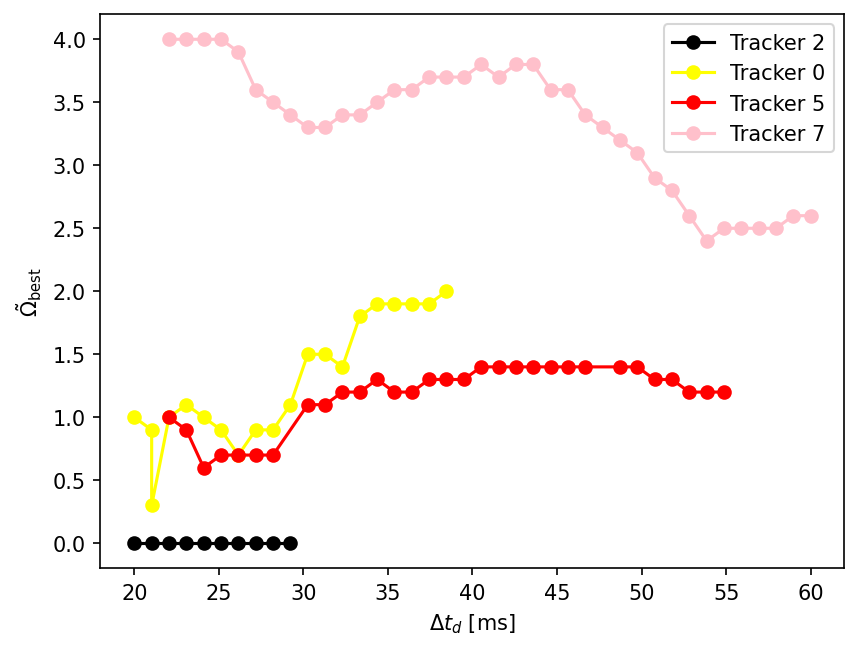

In [23]:
for key in trackers.keys():
    plt.plot(
        trackers[key]["td_arr"] * 1e3,
        trackers[key]["coord_arr"][:, 0],
        "-o",
        label=f"Tracker {key}",
    )
plt.xlabel(r"$\Delta t_d$ [ms]")
plt.ylabel(r"$\~{\Omega}_{\rm best}$")
plt.legend()

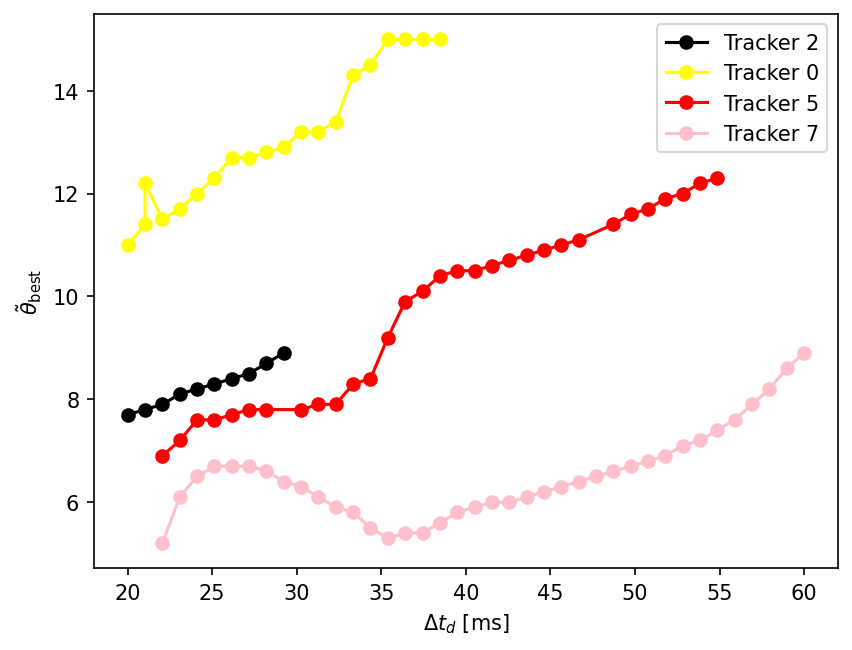

In [24]:
for key in trackers.keys():
    plt.plot(
        trackers[key]["td_arr"] * 1e3,
        trackers[key]["coord_arr"][:, 1],
        "-o",
        label=f"Tracker {key}",
    )
plt.xlabel(r"$\Delta t_d$ [ms]")
plt.ylabel(r"$\~{\theta}_{\rm best}$")
plt.legend()

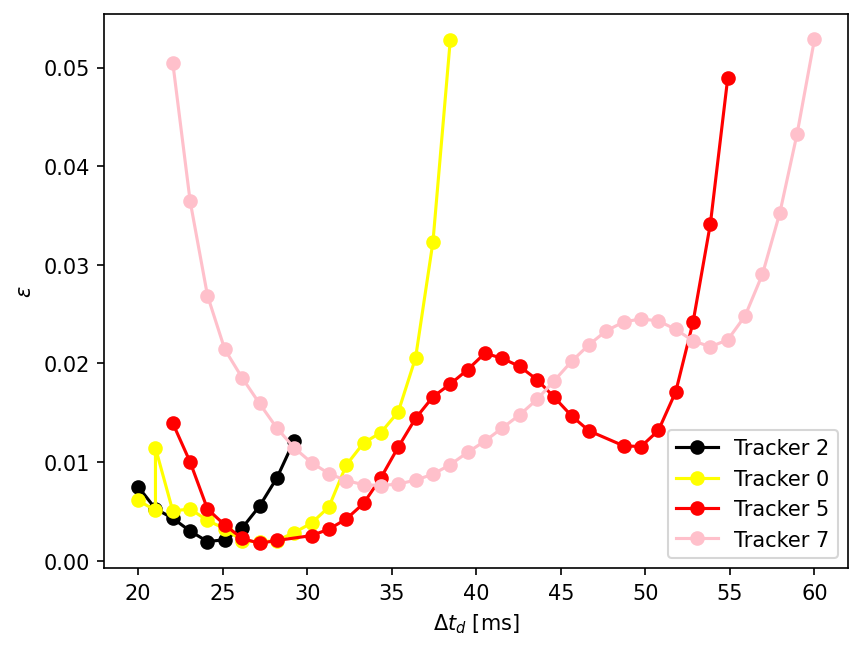

In [25]:
for key in trackers.keys():
    plt.plot(
        trackers[key]["td_arr"] * 1e3,
        trackers[key]["ep_arr"],
        "-o",
        label=f"Tracker {key}",
    )
plt.xlabel(r"$\Delta t_d$ [ms]")
plt.ylabel(r"$\epsilon$")
plt.legend()

## plot individual contours

IntSlider(value=20, description='td index:', max=39)

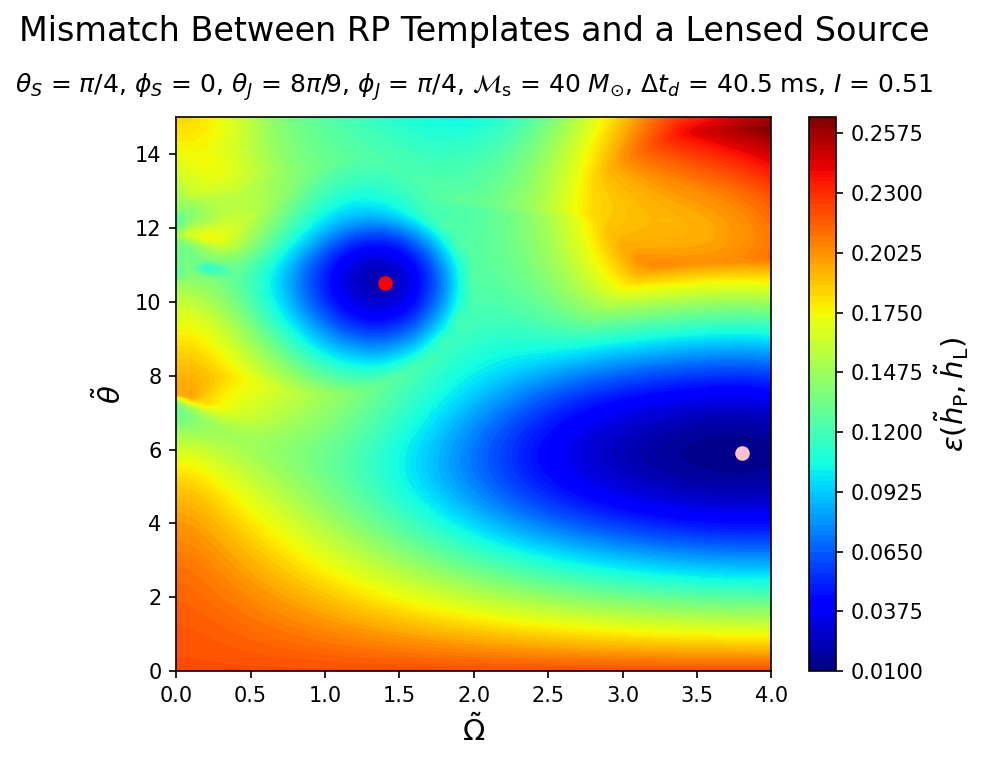

In [26]:
color_order = ["black", "yellow", "red", "pink"]
from IPython.display import clear_output

td_arr = np.sort(np.array([td for td in data.keys() if isinstance(td, float)]))
td_slider = ipywidgets.IntSlider(
    min=0, max=len(td_arr) - 1, step=1, value=0, description="td index:"
)
display(td_slider)


def update_plot(val):
    clear_output(wait=True)
    display(td_slider)
    td = td_arr[val["new"]]
    plot_indiv_contour_from_dict(data[td], I_arr[r], n_minima=0)
    for key, tracker in trackers.items():
        if td in tracker["td_arr"]:
            idx = np.where(tracker["td_arr"] == td)[0][0]
            plt.plot(
                tracker["coord_arr"][idx][0],
                tracker["coord_arr"][idx][1],
                "o",
                color=color_order[list(trackers.keys()).index(key)],
            )


td_slider.observe(update_plot, names="value")

# as a function of $I$ while fixing $\Delta t_d$

In [17]:
c = 18
data_I = data[td_arr[c]]

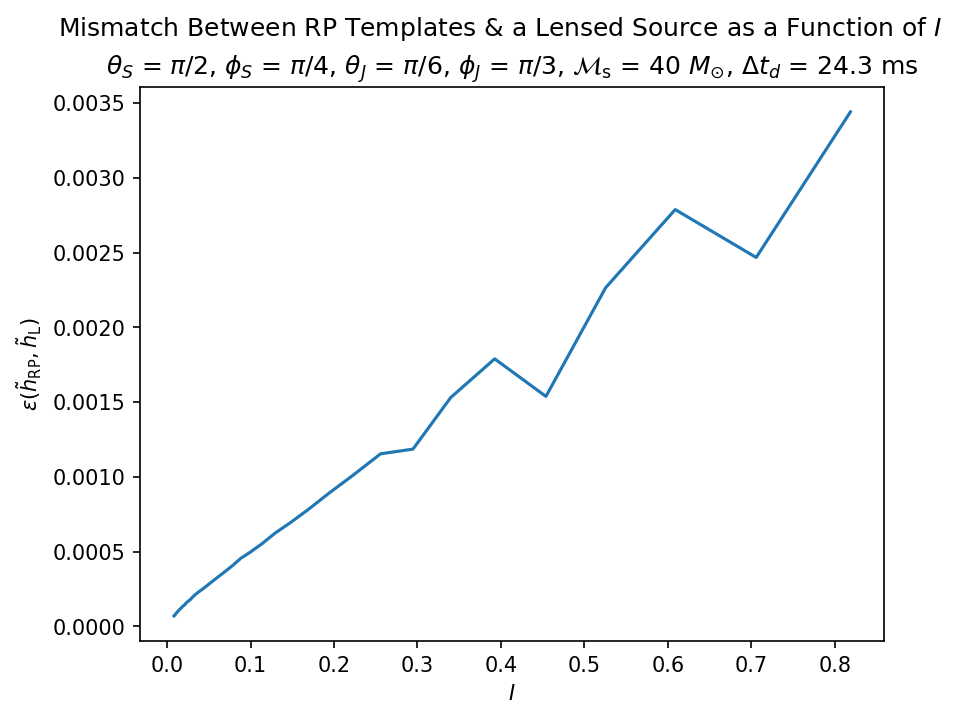

In [18]:
I_ep_min_arr = np.array([data_I[I]["stats"]["ep_min"] for I in I_arr])

plt.plot(I_arr, I_ep_min_arr, label=r"$\epsilon(\~h_{\rm RP}, \~h_{\rm L})$")
plt.xlabel(r"$I$")
plt.ylabel(r"$\epsilon(\~h_{\rm RP}, \~h_{\rm L})$")

plt.title(
    r"$\theta_S$ = {}, $\phi_S$ = {}, $\theta_J$ = {}, $\phi_J$ = {}, {} = {:.3g} {}, $\Delta t_d$ = {:.3g} ms".format(
        angle_in_pi_format(src_params["theta_S"]),
        angle_in_pi_format(src_params["phi_S"]),
        angle_in_pi_format(src_params["theta_J"]),
        angle_in_pi_format(src_params["phi_J"]),
        r"$\mathcal{M}_{\text{s}}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        data_I["td"] * 1e3,
    )
)

plt.suptitle(r"Mismatch Between RP Templates & a Lensed Source as a Function of $I$")

plt.show()

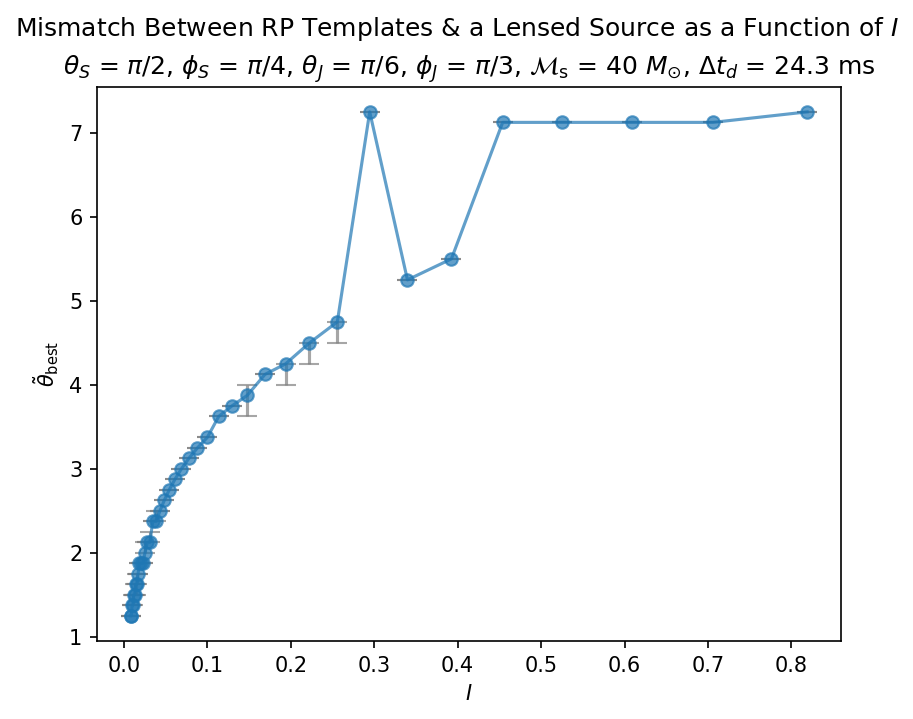

In [19]:
I_best_theta_arr = np.array([data_I[I]["stats"]["ep_min_theta_tilde"] for I in I_arr])

plt.errorbar(
    I_arr,
    I_best_theta_arr,
    yerr=get_asym_err(data_I, I_arr, "theta_tilde"),
    fmt="-o",
    label=r"$\~{\theta}_{\rm best}$",
    capsize=5,
    ecolor="grey",
    alpha=0.7,
)

plt.xlabel(r"$I$")
plt.ylabel(r"$\~{\theta}_{\rm best}$")

plt.title(
    r"$\theta_S$ = {}, $\phi_S$ = {}, $\theta_J$ = {}, $\phi_J$ = {}, {} = {:.3g} {}, $\Delta t_d$ = {:.3g} ms".format(
        angle_in_pi_format(src_params["theta_S"]),
        angle_in_pi_format(src_params["phi_S"]),
        angle_in_pi_format(src_params["theta_J"]),
        angle_in_pi_format(src_params["phi_J"]),
        r"$\mathcal{M}_{\text{s}}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        data_I["td"] * 1e3,
    )
)

plt.suptitle(r"Mismatch Between RP Templates & a Lensed Source as a Function of $I$")

plt.show()

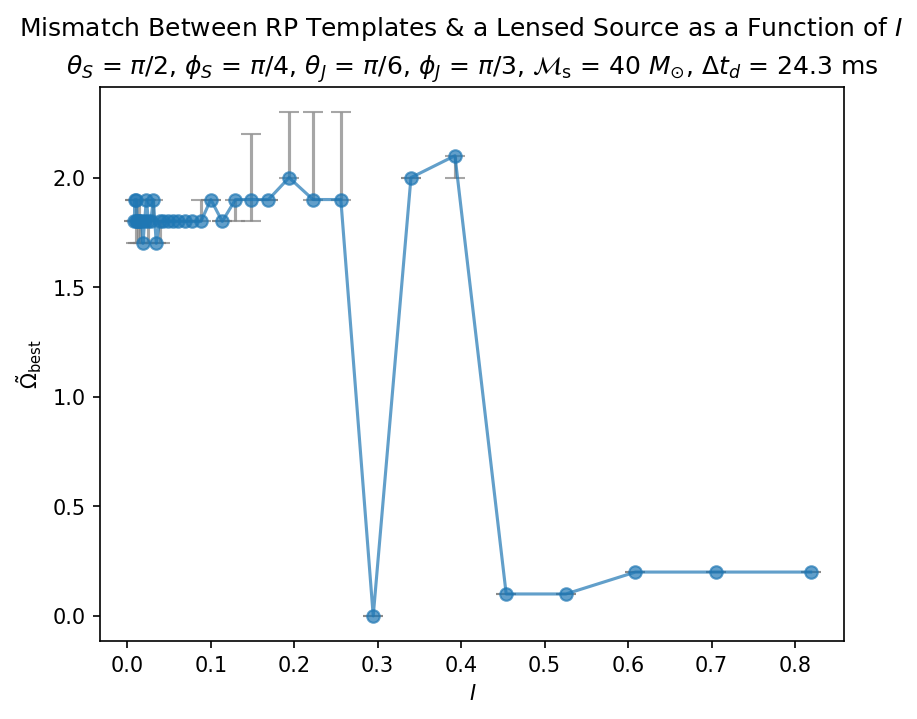

In [20]:
I_best_omega_arr = np.array([data_I[I]["stats"]["ep_min_omega_tilde"] for I in I_arr])

plt.errorbar(
    I_arr,
    I_best_omega_arr,
    yerr=get_asym_err(data_I, I_arr, "omega_tilde"),
    fmt="-o",
    label=r"$\~{\Omega}_{\rm best}$",
    capsize=5,
    ecolor="grey",
    alpha=0.7,
)

plt.xlabel(r"$I$")
plt.ylabel(r"$\~{\Omega}_{\rm best}$")

plt.title(
    r"$\theta_S$ = {}, $\phi_S$ = {}, $\theta_J$ = {}, $\phi_J$ = {}, {} = {:.3g} {}, $\Delta t_d$ = {:.3g} ms".format(
        angle_in_pi_format(src_params["theta_S"]),
        angle_in_pi_format(src_params["phi_S"]),
        angle_in_pi_format(src_params["theta_J"]),
        angle_in_pi_format(src_params["phi_J"]),
        r"$\mathcal{M}_{\text{s}}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        data_I["td"] * 1e3,
    )
)

plt.suptitle(r"Mismatch Between RP Templates & a Lensed Source as a Function of $I$")

plt.show()

IntSlider(value=30, description='I index:', max=39)

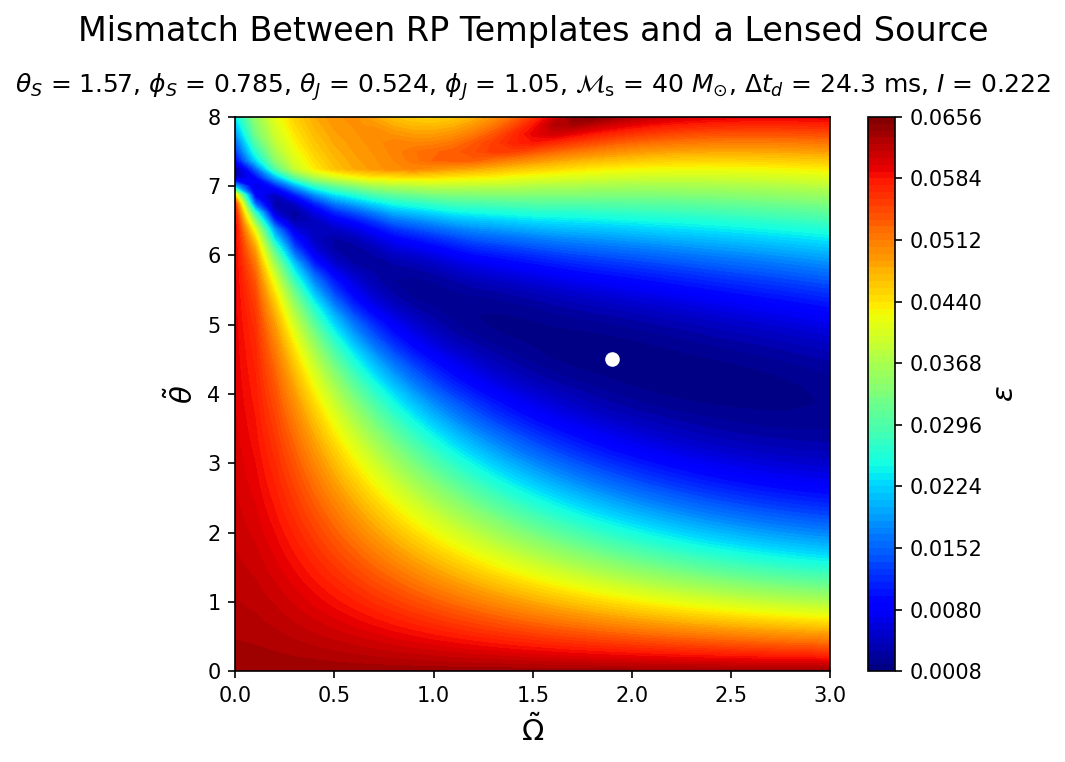

In [21]:
from IPython.display import clear_output

# Assuming td_arr and I_arr[r] are defined and have the same length
I_slider = ipywidgets.IntSlider(
    min=0, max=len(I_arr) - 1, step=1, value=0, description="I index:"
)
display(I_slider)


def update_plot(val):
    clear_output(wait=True)
    display(I_slider)
    I = I_arr[val["new"]]
    plot_indiv_contour_from_dict(data[td_arr[c]], I)  # type: ignore


I_slider.observe(update_plot, names="value")

# waveform comparison

In [28]:
# make data_td like data_I but with td as the key
I = I_arr[r]
data_td = {}
for td in td_arr:
    data_td[td] = data[td][I]

data_td["source_params"] = data[td_arr[0]]["source_params"]

idx = -4.74163e-09, phi = 1.66728e-08, both should be ~0 if get_updated_mismatch_results is True


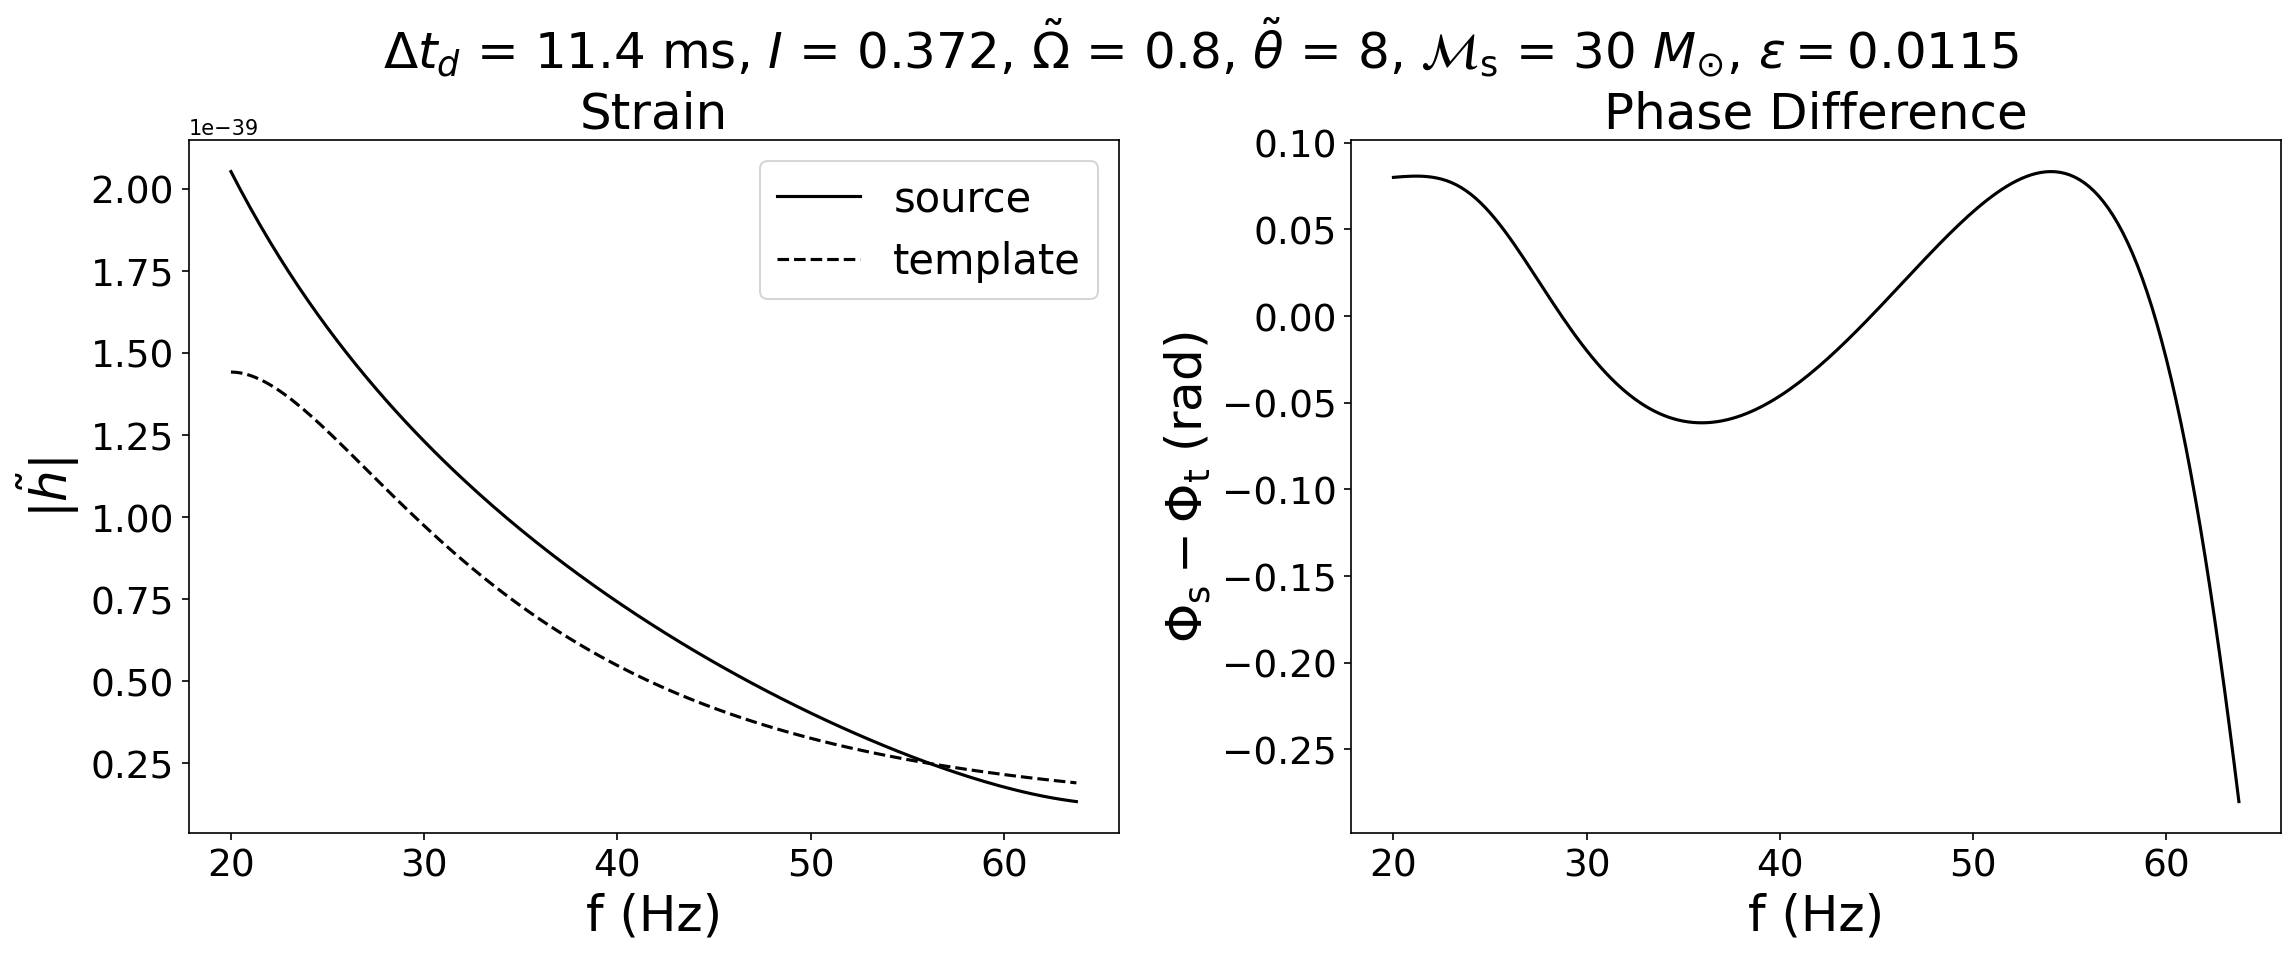

idx = -4.0277e-09, phi = -2.90184e-08, both should be ~0 if get_updated_mismatch_results is True


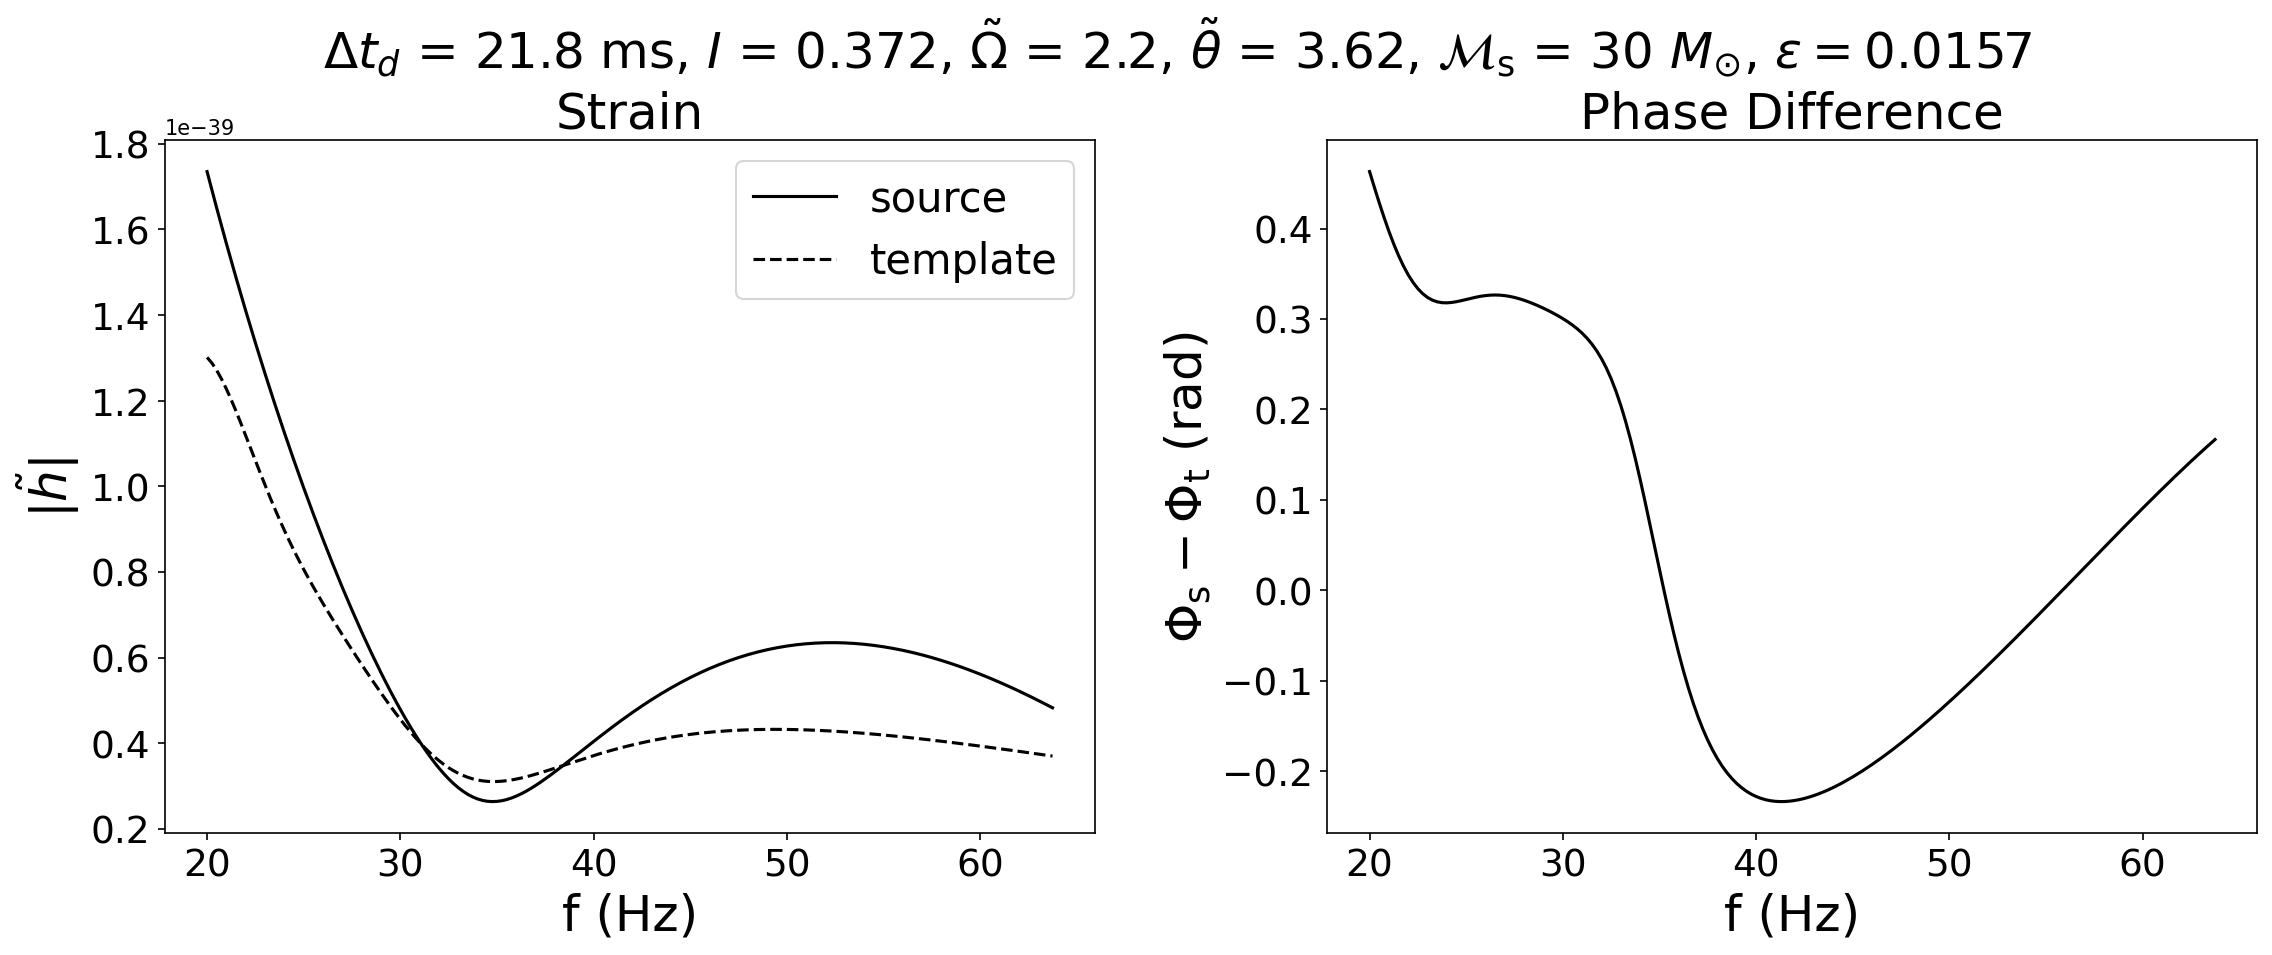

In [33]:
lens_params_2 = data_td["source_params"]
RP_params_2 = copy.deepcopy(RP_params_1)
RP_params_2["mcz"] = lens_params_2["mcz"]

MLz_arr = get_MLz_from_td(td_arr, data_td["source_params"]["y"])

for i in range(0, len(MLz_arr), 20):
    lens_params, RP_params = set_to_params(lens_params_2, RP_params_2)
    lens_params["MLz"] = MLz_arr[i] * solar_mass
    RP_params["omega_tilde"] = data_td[td_arr[i]]["stats"]["ep_min_omega_tilde"]
    RP_params["theta_tilde"] = data_td[td_arr[i]]["stats"]["ep_min_theta_tilde"]
    RP_params["gamma_P"] = data_td[td_arr[i]]["stats"]["ep_min_gammaP"]

    plot_waveform_comparison(RP_params, lens_params, get_updated_mismatch_results=True)
    plt.show()

In [ ]:
lens_params_2 = data_I["source_params"]
RP_params_2 = copy.deepcopy(RP_params_1)
RP_params_2["mcz"] = lens_params_2["mcz"]

y_arr = data_I["y_arr"]
MLz_arr = data_I["MLz_arr"]
I_arr = data_I["I_arr"]

for i in range(0, len(y_arr), 20):
    lens_params, RP_params = set_to_params(lens_params_2, RP_params_2)
    lens_params["y"] = y_arr[i]
    lens_params["MLz"] = MLz_arr[i] * solar_mass
    RP_params["omega_tilde"] = data_I[I_arr[i]]["stats"]["ep_min_omega_tilde"]
    RP_params["theta_tilde"] = data_I[I_arr[i]]["stats"]["ep_min_theta_tilde"]
    RP_params["gamma_P"] = data_I[I_arr[i]]["stats"]["ep_min_gammaP"]

    plot_waveform_comparison(RP_params, lens_params, get_updated_mismatch_results=True)
    plt.show()